# Introduction

this is data preprocess for English Housing Survey free access datasets, download address: 

(1) Fuel poverty dataset 2021 : https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=9243

(2) English Housing Survey, 2021-2022: Household Data: https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=9230

these datasets contains fuel poverty indicators: 10% (before and after housing cost), LILEE, so we need to calculate LIHC if needed


In [2]:
#  neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
# import 2021 fuel poverty datasets
df_ep = pd.read_csv('./raw_data_EHS/fuel_poverty_2021_ukda_eul.csv')

In [3]:
# import housing stock datasets
df_general_plus = pd.read_csv('./raw_data_EHS/general20_plus_21_eul.csv')
df_interview_plus = pd.read_csv('./raw_data_EHS/interview_20_plus_21_eul.csv')
df_house_quality = pd.read_csv('./raw_data_EHS/modelled_housing_quality_variables_20_plus_21_eul.csv')
df_physical = pd.read_csv('./raw_data_EHS/physical_20_plus_21_eul.csv')

In [4]:
# check the shape of the datasets
print("datasets EHS from 2021 Fuel Poverty data")
print(f'fuel poverty dataset {df_ep.shape}')
print("-"*50)
print("datasets EHS from 2021 housing stock data")
print(df_general_plus.shape)
print(df_interview_plus.shape)
print(df_house_quality.shape)
print(df_physical.shape)

datasets EHS from 2021 Fuel Poverty data
fuel poverty dataset (10572, 48)
--------------------------------------------------
datasets EHS from 2021 housing stock data
(10572, 10)
(10572, 73)
(10572, 5)
(10572, 48)


In [5]:
# check columns of the datasets and find proxy for census data and proxy for inputs used in the benchmark model

In [6]:
df_ep.columns

Index(['serialanon', 'fpLILEEflg', 'AHCIncomeEQ_LILEE', 'fpfullinc',
       'fuelexpn', 'FuelCosteqFactor', 'EqAHCincDeciles_LILEE', 'elecmop',
       'gasmop', 'aagph2021', 'FPGAP_LILEE', 'fpvuln', 'fpLILEEqdt',
       'FPEERband', 'FPEERrating', 'DWtype', 'DWage', 'Ongas',
       'CentralHeating', 'Mainfueltype', 'boiler', 'WallType', 'tenure4x',
       'Loftins', 'EPC', 'SAP12', 'hhcompx', 'Ageyng', 'Ageold', 'Hhsize',
       'ethhrp2x', 'Hhsick', 'Unoc', 'emphrp3x', 'ECO_AW', 'FloorArea',
       'gorehs', 'HTHG', 'WHDBroad', 'HousingCosts', 'fpbasinc', 'wathcost',
       'spahcost', 'litecost', 'cookcost', 'BHCflg10', 'AHCflg10',
       'FullincDeciles'],
      dtype='object')

In [7]:
# rename duplicate columns in other datasets
df_ep.rename(columns={'tenure4x': 'tenure4x_fp'}, inplace=True) # tenure4x is a duplicate column in the general dataset, rename to tenure4x_fp means this column is specific to the fuel poverty dataset is from the fuel poverty dataset

In [8]:
df_general_plus.columns

Index(['serialanon', 'aagpd2021', 'aagph2021', 'tenure8x', 'tenure4x',
       'tenure2x', 'vacantx', 'gorehs', 'region3x', 'govreg1'],
      dtype='object')

In [9]:
df_general_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10572 entries, 0 to 10571
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   serialanon  10572 non-null  int64
 1   aagpd2021   10572 non-null  int64
 2   aagph2021   10572 non-null  int64
 3   tenure8x    10572 non-null  int64
 4   tenure4x    10572 non-null  int64
 5   tenure2x    10572 non-null  int64
 6   vacantx     10572 non-null  int64
 7   gorehs      10572 non-null  int64
 8   region3x    10572 non-null  int64
 9   govreg1     10572 non-null  int64
dtypes: int64(10)
memory usage: 826.1 KB


In [10]:
df_interview_plus.columns

Index(['serialanon', 'hhcompx', 'hhcomp1', 'hhtype11', 'hhtype7', 'hhtype6',
       'hhsizex', 'ndepchild', 'noUnits1', 'sft', 'agehrp2x', 'agehrp4x',
       'agehrp6x', 'agepart6x', 'ager', 'pyngbx', 'ageoldbx', 'emphrpx',
       'emphrp3x', 'nssech9', 'nssecp9', 'hhempx', 'empprtx', 'empprt3x',
       'workless', 'atspahrp', 'atspaprt', 'atspaany', 'ethhrp2x', 'ethprt2x',
       'sexhrp', 'freeLeas', 'owntype', 'hatentp3', 'srtentype2', 'bedstdx',
       'nbedsx', 'bedrqx', 'lharqx', 'lhastdx', 'nrooms1a', 'sharer',
       'accomhh1', 'lenresb', 'lenownb', 'ftbuyer', 'prevten', 'tenex',
       'tenure2', 'tenure4', 'hhltsick', 'hhwhch', 'mortwkx', 'rentwkx',
       'rentExS', 'hhincx', 'hhinc5x', 'amthbenx', 'housbenx', 'hhbensx',
       'JOINTINCx', 'ALLincx', 'HYEARGRx', 'hhvulx', 'market_rent', 'equityr',
       'equityr5', 'BHCinceq', 'BHCinceqv5', 'BHCinceqv60h', 'AHCinceq',
       'AHCinceqv5', 'AHCinceqv60h'],
      dtype='object')

In [11]:
df_house_quality.columns

Index(['serialanon', 'dampalfm', 'dhhhsrsym', 'dhomeszm', 'dhcostzm'], dtype='object')

In [12]:
df_physical.columns

Index(['serialanon', 'dwtypenx', 'dwtype8x', 'dwtype3x', 'housex', 'dwage7x',
       'dwage6x', 'dwage5x', 'dwage4x', 'alltypex', 'floorx', 'floor5x',
       'floory', 'floor5y', 'storeyx', 'dblglaz2', 'dblglaz4', 'parking',
       'neivisx', 'lv1upkpx', 'lv2trafx', 'lv3utilx', 'lvnumx', 'lvanyx',
       'attic', 'heat4x', 'heat7x', 'sysage', 'fuelx', 'watersys', 'boiler',
       'mainsgas', 'watercyl', 'loftinsx', 'loftins4', 'loftins6', 'loftinsu',
       'loftu4', 'wallinsz', 'wallcavy', 'pcavwallx', 'wins95x', 'sap12',
       'sap412', 'rdsap09', 'EPceeb12e', 'EPceir12e', 'EPceib12e'],
      dtype='object')

In [13]:
# Merge the all dataframes on the common columns,
df = pd.merge(df_ep, df_general_plus, on='serialanon', how='right')
df2 = pd.merge(df, df_interview_plus, on='serialanon', how='right')
df3 = pd.merge(df2, df_house_quality, on='serialanon', how='right')
df_merge = pd.merge(df3, df_physical, on='serialanon', how='right')

# Print the shape of the merged dataframe
print("Shape of the merged dataframe:", df_merge.shape)

Shape of the merged dataframe: (10572, 180)


In [14]:
# select proxy census variable and other proxy input variables used in benchmark model

# list_proxy_census = []

# list_proxy_inputs_br = []

In [15]:
# so we have a comprehensive dataset that contain 180 variables
# copy the dataset
df_clean = df_merge.copy()

## Calculate LIHC indicator

In [16]:
# calculate Low Income High Cost indicator
# https://assets.publishing.service.gov.uk/media/603fcdaee90e077dd08f15e6/Fuel_Poverty_Methodology_Handbook_2020_LIHC.pdf page 63-64
df_clean = df_clean.copy()
df_clean['Equivalised fuel costs'] = df_clean['fuelexpn'] / df_clean['FuelCosteqFactor'] 
df_clean['Equivalised AHC income'] = df_clean['AHCIncomeEQ_LILEE']

# for this dataset, the cost threshold and income threshold are below:
Median_equivalised_fuel_costs_threshold = df_clean['Equivalised fuel costs'].median()

equivalised_AHC_median_income_threshold = 0.6*df_clean['Equivalised AHC income'].median()
df_clean['household_income_threshold'] = df_clean['Equivalised fuel costs'] + equivalised_AHC_median_income_threshold # 0.6*median + fuel cost

# here, we define the energy poverty by Low Income High Cost indocator
df_clean['fpLIHCflg'] = np.where((df_clean['Equivalised fuel costs'] > Median_equivalised_fuel_costs_threshold) 
                                  & (df_clean['Equivalised AHC income'] < df_clean['household_income_threshold']), 1, 0)

In [19]:
# save the dataset for model development
df_clean = df_clean.drop(columns=['serialanon'])
df_clean.to_csv('clean_data.csv', index=False)

# Exploratory data analysis

In [ ]:
df_EDA = pd.read_csv('clean_data.csv')

In [6]:
df = df_EDA.copy()

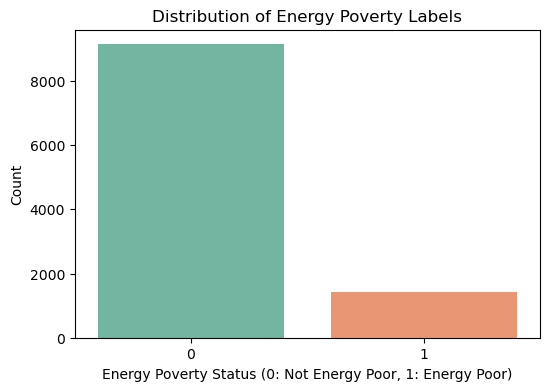

Percentage of Energy Poor Households: 13.55%


In [7]:
# Target Variable Distribution (Energy Poverty Status)

# Set figure size
plt.figure(figsize=(6, 4))

# Countplot for energy poverty status
sns.countplot(x='fpLIHCflg', data=df, palette="Set2")

# Add labels
plt.title('Distribution of Energy Poverty Labels')
plt.xlabel('Energy Poverty Status (0: Not Energy Poor, 1: Energy Poor)')
plt.ylabel('Count')

# Show plot
plt.show()

# Compute percentage of energy-poor households
poverty_rate = df['fpLIHCflg'].mean() * 100
print(f"Percentage of Energy Poor Households: {poverty_rate:.2f}%")
